In [1]:
#!pip install pandas

In [2]:
import os
import io
import sys
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
import missingno as msno
from imblearn.over_sampling import RandomOverSampler
import plotly.express as px
from collections import Counter
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm



In [3]:
file_path = "/home/luis/Documentos/Inteligencia_artificial/data.csv"

try:
    with open(file_path, 'r') as file:
        # Realizar operaciones con el archivo aquí
        # Por ejemplo, puedes leer su contenido o procesarlo de alguna manera
        uploaded = file.read()
        print("Contenido del archivo:")
        print(uploaded)
except FileNotFoundError:
    print("El archivo no fue encontrado en la ruta especificada.")
except Exception as e:
    print("Se produjo un error al abrir el archivo:", str(e))


Contenido del archivo:
Week of the month (first week, second, third, fourth or fifth week;Day of the week (Monday to Friday);Non-urgent order;Urgent order;Order type A;Order type B;Order type C;Fiscal sector orders;Orders from the traffic controller sector;Banking orders (1);Banking orders (2);Banking orders (3);Target (Total orders)
1;4;316.307;223.270;61.543;175.586;302.448;0;65556;44914;188411;14793;539.577
1;5;128.633;96.042;38.058;56.037;130.580;0;40419;21399;89461;7679;224.675
1;6;43.651;84.375;21.826;25.125;82.461;1.386;11992;3452;21305;14947;129.412
2;2;171.297;127.667;41.542;113.294;162.284;18.156;49971;33703;69054;18423;317.120
2;3;90.532;113.526;37.679;56.618;116.220;6.459;48534;19646;16411;20257;210.517
2;4;110.925;96.360;30.792;50.704;125.868;79;52042;8773;47522;24966;207.364
2;5;144.124;118.919;43.304;66.371;153.368;0;46573;33597;48269;20973;263.043
2;6;119.379;113.870;38.584;85.961;124.413;15.709;35033;26278;56665;18502;248.958
3;2;218.856;124.381;33.973;148.274;162.044;

In [4]:
filename = '/home/luis/Documentos/Inteligencia_artificial/data.csv'
df = pd.read_csv(filename, delimiter=";")
print(df)
pd.set_option('display.max_columns', None)
df.head()


    Week of the month (first week, second, third, fourth or fifth week  \
0                                                   1                    
1                                                   1                    
2                                                   1                    
3                                                   2                    
4                                                   2                    
5                                                   2                    
6                                                   2                    
7                                                   2                    
8                                                   3                    
9                                                   3                    
10                                                  3                    
11                                                  3                    
12                                    

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [5]:
df.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 1   Day of the week (Monday to Friday)                                  60 non-null     int64  
 2   Non-urgent order                                                    60 non-null     float64
 3   Urgent order                                                        60 non-null     float64
 4   Order type A                                                        60 non-null     float64
 5   Order type B                                                        60 non-null     float64
 6   Order type C                                                        60 non-null     float64
 7   Fiscal sector order

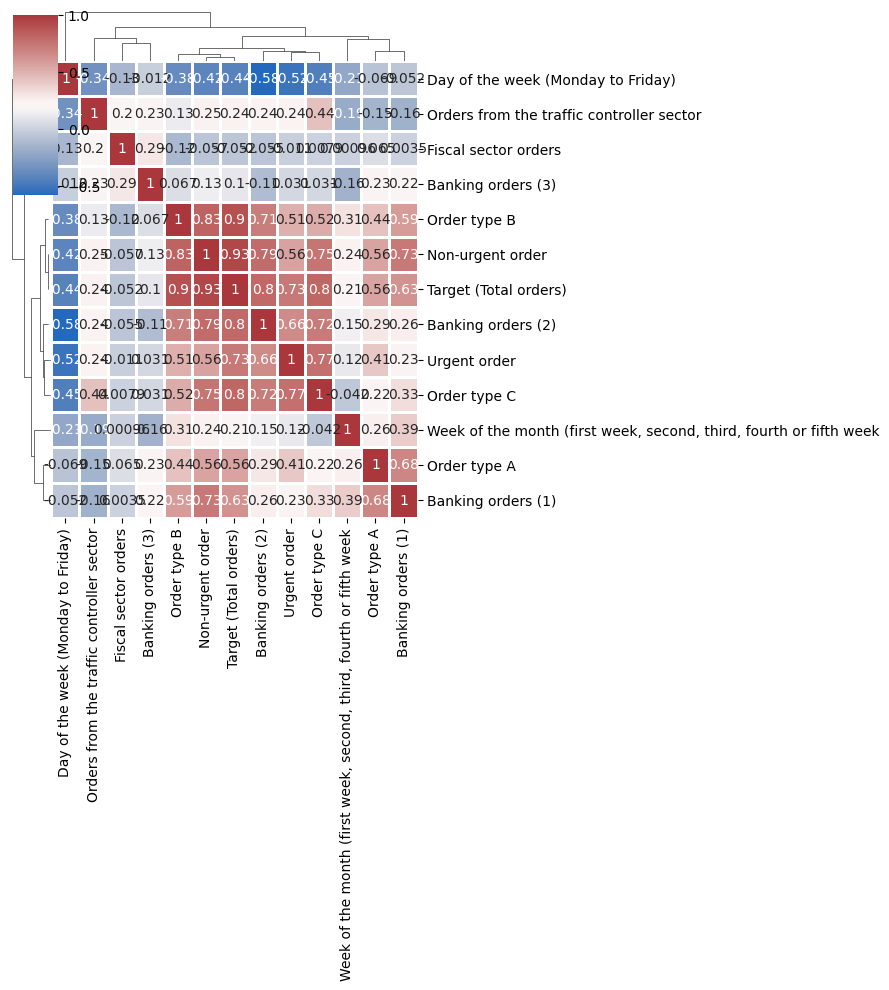

In [7]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.1), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

In [8]:
df.isnull().sum()

Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                                 0
dtype: int64

In [9]:
X = df.drop('Target (Total orders)', axis=1)
y = df['Target (Total orders)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [10]:
x_train_max = np.max(X_train, axis=0)
x_train_min = np.min(X_train, axis=0)
X_train_normalized = (X_train - x_train_min) / (x_train_max - x_train_min)
X_test_normalized = (X_test - x_train_min) / (x_train_max - x_train_min)
print()
print(x_train_max)
print()
print(x_train_min)
print()
print(X_train_normalized)
print()
print(X_test_normalized)


Week of the month (first week, second, third, fourth or fifth week         5.000
Day of the week (Monday to Friday)                                         6.000
Non-urgent order                                                         381.768
Urgent order                                                             223.270
Order type A                                                             118.178
Order type B                                                             260.632
Order type C                                                             302.448
Fiscal sector orders                                                     540.000
Orders from the traffic controller sector                              71772.000
Banking orders (1)                                                    194216.000
Banking orders (2)                                                    188411.000
Banking orders (3)                                                     55445.000
dtype: float64

Week of the

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


models = [("GradientBoostingRegressor", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)),
          ("LinearRegression", LinearRegression()),
          ("DecisionTreeRegressor", DecisionTreeRegressor(max_depth=4)),
          ("RandomForestRegressor", RandomForestRegressor())]

finalResults = []
k_fold = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)
for name, model in models:
    mse_scores = []
    r2_scores = []
    mae_scores = []
    for train_index, test_index in k_fold.split(X_train, y_train):
        data_train, data_test = X_train.iloc[train_index], X_train.iloc[test_index]
        target_train, target_test = y_train.iloc[train_index], y_train.iloc[test_index]
        model.fit(data_train, target_train)
        predict = model.predict(data_test)
        mse = mean_squared_error(target_test, predict)
        mse_scores.append(mse)
        r2 = r2_score(target_test, predict)
        r2_scores.append(r2)
        mae = mean_absolute_error(target_test, predict)
        mae_scores.append(mae)
    avg_mse = sum(mse_scores) / len(mse_scores)
    avg_r2 = sum(r2_scores) / len(r2_scores)
    avg_mae = sum(mae_scores) / len(mae_scores)
    finalResults.append({'name': name, 'MSE': avg_mse, 'R^2': avg_r2, 'MAE': avg_mae})
print(finalResults)


[{'name': 'GradientBoostingRegressor', 'MSE': 994.1128558639236, 'R^2': 0.8748157527477931, 'MAE': 20.48831956663596}, {'name': 'LinearRegression', 'MSE': 6.244069250555518e-24, 'R^2': 1.0, 'MAE': 1.738934921983552e-12}, {'name': 'DecisionTreeRegressor', 'MSE': 1581.308197619021, 'R^2': 0.792806543908444, 'MAE': 28.064256530182774}, {'name': 'RandomForestRegressor', 'MSE': 1417.096199119706, 'R^2': 0.8222121911439789, 'MAE': 21.991203833333294}]


In [12]:
df_result = pd.DataFrame.from_dict(finalResults)
df_result

,name,MSE,R^2,MAE
0,GradientBoostingRegressor,9.941129e+02,0.874816,2.048832e+01
1,LinearRegression,6.244069e-24,1.000000,1.738935e-12
2,DecisionTreeRegressor,1.581308e+03,0.792807,2.806426e+01
3,RandomForestRegressor,1.417096e+03,0.822212,2.199120e+01


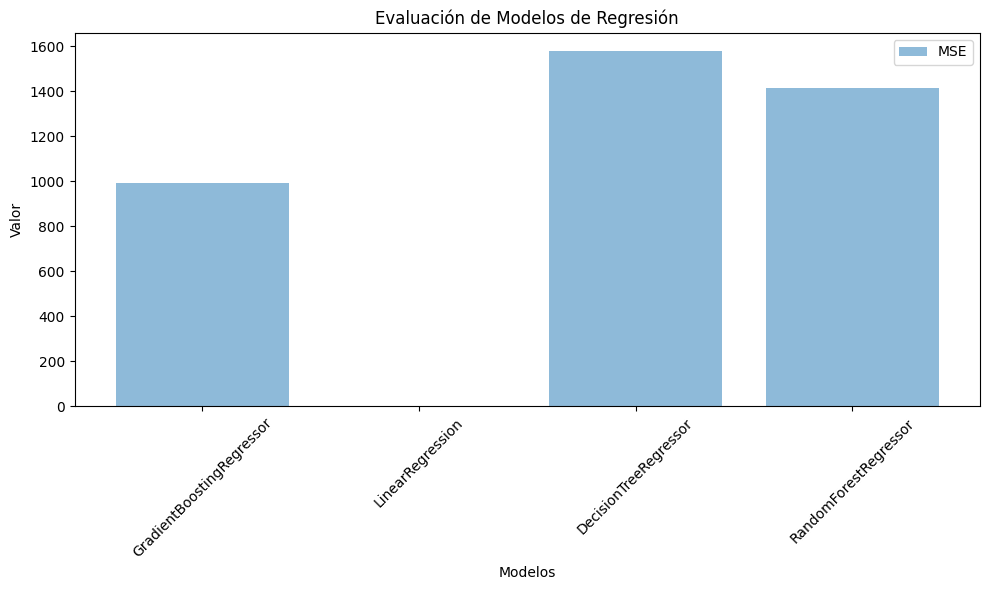

In [13]:
model_names = [result['name'] for result in finalResults]
mse_values = [result['MSE'] for result in finalResults]
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, label='MSE', alpha=0.5)
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Evaluación de Modelos de Regresión')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

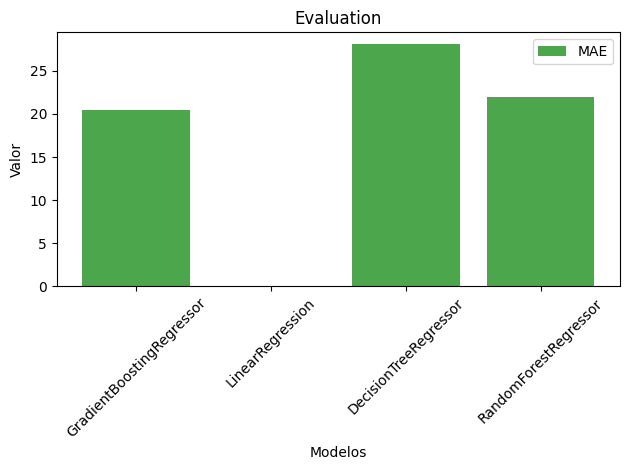

In [14]:
model_names = [result['name'] for result in finalResults]
mae_values = [result['MAE'] for result in finalResults]

plt.bar(model_names, mae_values, label='MAE', alpha=0.7,color = "green")

plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Evaluation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


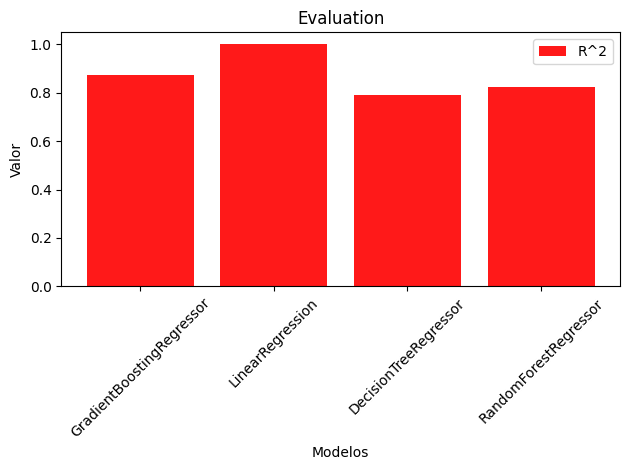

In [15]:
model_names = [result['name'] for result in finalResults]
r2_values = [result['R^2'] for result in finalResults]
plt.bar(model_names, r2_values, label='R^2', alpha=0.9, color = "red")
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Evaluation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

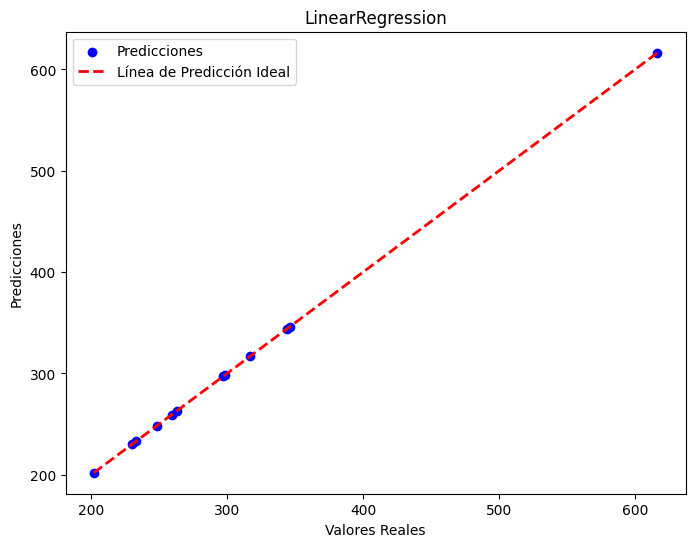

In [16]:
# Entrenar el modelo de regresión lineal
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
predictions = linear_regression_model.predict(X_test)

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Línea de Predicción Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('LinearRegression')
plt.legend()
plt.show()